In [3]:
from rdkit import RDLogger, Chem, DataStructs
from rdkit.Chem import AllChem, Draw, Descriptors, Lipinski
from rdkit.Chem.Draw import IPythonConsole
RDLogger.DisableLog('rdApp.*')

import numpy as np
import pandas as pd

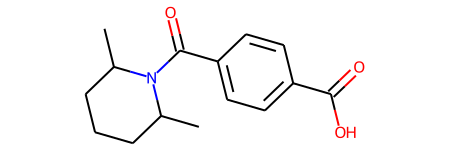

In [32]:
ex = Chem.MolFromSmiles('CC1CCCC(C)N1C(=O)c1ccc(C(=O)O)cc1')
ex

In [33]:
print(Lipinski.NumHAcceptors(ex), 
      Lipinski.FractionCSP3(ex), 
      Lipinski.HeavyAtomCount(ex), 
      Lipinski.NHOHCount(ex), 
      Lipinski.NOCount(ex),
      Lipinski.NumAliphaticCarbocycles(ex),
      Lipinski.NumAliphaticHeterocycles(ex),
      Lipinski.NumAliphaticRings(ex),
      Lipinski.NumAromaticCarbocycles(ex),
      Lipinski.NumAromaticHeterocycles(ex),
      Lipinski.NumAromaticRings(ex),
      Lipinski.NumHAcceptors(ex),
      Lipinski.NumHDonors(ex),
      Lipinski.NumHeteroatoms(ex),
      Lipinski.NumRotatableBonds(ex),
      Lipinski.NumSaturatedCarbocycles(ex),
      Lipinski.NumSaturatedHeterocycles(ex),
      Lipinski.NumSaturatedRings(ex),
      Lipinski.RingCount(ex))

2 0.4666666666666667 19 1 4 0 1 1 1 0 1 2 1 4 2 0 1 1 2


ultimately the ones that i would like to use include: MolWt, MolLogP, NumHDonors, NumHAcceptors, TPSA, NumRotatableBonds

In [34]:
Descriptors.MolWt(ex)
Descriptors.MolLogP(ex)
Descriptors.NumHDonors(ex)
Descriptors.NumHAcceptors(ex)
Descriptors.TPSA(ex)
Descriptors.NumRotatableBonds(ex)

2

In [35]:
def smiles2mols(smiles_list):

    mols_list = []
    
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        mols_list.append(mol)
    
    return mols_list

In [36]:
def gen_descriptors(smiles_list):
    
    descriptors_list = []
    num_smiles = len(smiles_list)
    num_descriptors = 21
    
    for smiles in smiles_list:
        row = [Descriptors.MolWt(smiles), 
               Descriptors.MolLogP(smiles), 
               Descriptors.NumHDonors(smiles), 
               Descriptors.NumHAcceptors(smiles), 
               Descriptors.TPSA(smiles), 
               Descriptors.NumRotatableBonds(smiles),
               
               Lipinski.FractionCSP3(smiles), 
               Lipinski.HeavyAtomCount(smiles), 
               Lipinski.NHOHCount(smiles), 
               Lipinski.NOCount(smiles),
               Lipinski.NumAliphaticCarbocycles(smiles),
               Lipinski.NumAliphaticHeterocycles(smiles),
               Lipinski.NumAliphaticRings(smiles),
               Lipinski.NumAromaticCarbocycles(smiles),
               Lipinski.NumAromaticHeterocycles(smiles),
               Lipinski.NumAromaticRings(smiles),
               Lipinski.NumHeteroatoms(smiles),
               Lipinski.NumSaturatedCarbocycles(smiles),
               Lipinski.NumSaturatedHeterocycles(smiles),
               Lipinski.NumSaturatedRings(smiles),
               Lipinski.RingCount(smiles)]
        
        descriptors_list = np.concatenate((descriptors_list, row), axis=0)
        
    descriptors_list = descriptors_list.reshape(num_smiles, num_descriptors)
    
    return descriptors_list

Something to consider: pairwise diversity between molecules in the dataset - can make diversity dataset

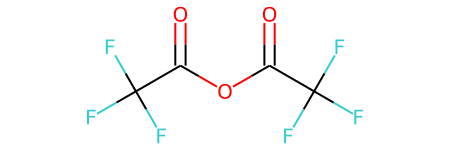

In [37]:
# First nanoparticle from the qnar paper
Chem.MolFromSmiles('FC(F)(F)C(=O)OC(=O)C(F)(F)F')

In [38]:
# First 3 nanoparticles from the qnar paper compiled into a list
qnar_list = ['FC(F)(F)C(=O)OC(=O)C(F)(F)F', 'FC(F)(Cl)C(=O)OC(=O)C(F)(F)Cl', 'FC(F)(F)C(F)(F)C(=O)OC(=O)C(F)(F)C(F)(F)F']

In [40]:
mols = smiles2mols(qnar_list)
descriptors = gen_descriptors(mols)

In [43]:
headers = ['MolWt', 'MolLogP', 'NumHDonors', 'NumHAcceptors', 'TPSA', 'NumRotatableBonds', 'FractionCSP3', 'HeavyAtomCount', 'NHOHCount', 'NOCount', 'NumAliphaticCarbocycles', 'NumAliphaticHeterocycles', 'NumAliphaticRings', 'NumAromaticCarbocycles', 'NumAromaticHeterocycles', 'NumAromaticRings', 'NumHeteroatoms', 'NumSaturatedCarbocycles', 'NumSaturatedHeterocycles', 'NumSaturatedRings', 'RingCount']

df = pd.DataFrame(descriptors, columns = headers)
df.head()

,MolWt,MolLogP,NumHDonors,NumHAcceptors,TPSA,NumRotatableBonds,FractionCSP3,HeavyAtomCount,NHOHCount,NOCount,...,NumAliphaticHeterocycles,NumAliphaticRings,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumHeteroatoms,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,RingCount
0,210.029,1.1808,0.0,3.0,43.37,0.0,0.500000,13.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0
1,242.939,1.7194,0.0,3.0,43.37,2.0,0.500000,13.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0
2,310.043,2.4514,0.0,3.0,43.37,2.0,0.666667,19.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0
